In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

> Consider a Barberis, Huang and Santos (2001) economy with the following parameter choices for the investor's utility function:
δ=0.99,γ=1,λ=2
Consumption growth has a lognormal distribution:
lng̃ =0.02+0.02ϵ̃ 
where epsilon is a standard normal random variable. With these parameter choices, the risk-free rate is constant at 1.0303 per year. 
Simulate the distribution for consumption growth with at least 10,000 random draws for epsilon. 


In [15]:
g=[]
for i in range(10000):
    epsilon=np.random.randn()
    a=np.random.rand()
    if a>0.01:
        nu=0
    else:
        nu=np.log(0.5)
    gi=np.exp(0.02+0.02*epsilon+nu)
    g.append(gi)
g=np.array(g)

>Define x as one plus the dividend-price ratio for the market portfolio:Define x as one plus the dividend-price ratio for the market portfolio:
x=(1+P/D)D/P=1+D/P
and define the error term:
e(x)=0.99b0E[ν̂ (xg̃ )]+0.99x−1
where utility from financial gain or loss is given by:
ν̂ (R)=R−1.0303 for R≥1.0303
ν̂ (R)=2(R−1.0303)forR<1.0303
Calculate the equilibrium values of x for b0 in the range [0, 10] in increments of 0.1, using an iterative procedure known as bisection search:

In [18]:
rf=1.0303
def nuhat(R):
    if R>rf:
        return R-rf
    if R<rf:
        return 2*(R-rf)
def error(x,g,b0):
    nu=0
    for i in g:
        nui=nuhat(i*x)
        nu+=nui
    nu=nu/len(g)
    return 0.99*b0*nu+0.99*x-1

#compute x, for one b0, get one xi 
b0=np.linspace(0,10,101)
x=[]
for i in b0:
    xi=bisect(lambda x: error(x,g,i),1,1.1)
    x.append(xi)
x=np.array(x)
print('x',x)

x [1.01010101 1.01163148 1.0128133  1.01375765 1.01453181 1.01517906
 1.01572899 1.01620254 1.016615   1.01697742 1.01729854 1.01758522
 1.01784281 1.01807561 1.01828701 1.01847991 1.01865664 1.01881906
 1.01896891 1.01910761 1.01923643 1.01935634 1.01946825 1.01957297
 1.01967115 1.01976338 1.01985022 1.01993208 1.02000939 1.02008254
 1.02015185 1.02021762 1.02028009 1.0203395  1.02039608 1.02045005
 1.02050157 1.0205508  1.02059788 1.02064297 1.02068618 1.02072763
 1.02076742 1.02080565 1.02084242 1.02087781 1.02091189 1.02094474
 1.02097642 1.02100699 1.0210365  1.02106501 1.02109258 1.02111924
 1.02114505 1.02117004 1.02119426 1.02121773 1.0212405  1.02126259
 1.02128404 1.02130487 1.0213251  1.02134477 1.02136389 1.02138249
 1.02140059 1.02141821 1.02143538 1.02145209 1.02146838 1.02148426
 1.02149975 1.02151485 1.02152958 1.02154396 1.021558   1.02157171
 1.0215851  1.02159819 1.02161097 1.02162347 1.0216357  1.02164765
 1.02165935 1.02167079 1.02168199 1.02169296 1.02170369 1.02

>Use x to calculate the price-dividend ratio for the market portfolio:
P/D=1/(x−1)
Plot the price-dividend ratio (on the vertical axis) vs b0 (on the horizontal axis).

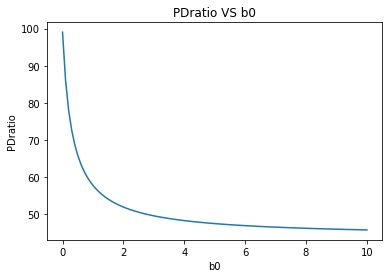

In [19]:
PDratio=1/(x-1)
plt.plot(b0,PDratio)
plt.xlabel('b0')
plt.ylabel('PDratio')
plt.title('PDratio VS b0')
plt.show()

>calculate the expected market return:
E[Rm]=E[xg̃ ]
Plot the equity premium (on the vertical axis) vs b0 (on the horizontal axis).

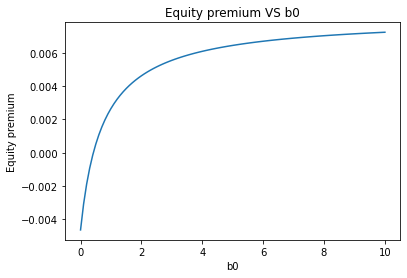

In [20]:
rm=x*(g.mean())
premium=rm-rf
plt.plot(b0,premium)
plt.xlabel('b0')
plt.ylabel('Equity premium')
plt.title('Equity premium VS b0')
plt.show()

##### Investor's utility function for financial gain or loss [i.e., nuhat(R)]:
Adding the investor’s utility function for financial gain or loss to investors’ preference allows us to incorporate the prospect theory, where financial gain or loss is measured relative to reference level based on risk-free rate


##### Parameter lambda:
Investor is more sensitive to financial loss than financial gain, and lambda determines degree of loss aversion, so lambda must be bigger than 1. The more sensitive the investors are to financial losses, the bigger the lambda. 


##### Parameter b0 :
b0 determines amount of emphasis that investor puts on utility from financial gain or loss, compared to utility of consumption. Equity premium will increase with b0, as investors puts more emphasis in utility from financial gain or loss